# Workshop 8 - Introduction to Deep Neural Networks

Code for workshop 8.  This will use Keras (within tensorflow v2) to build a small fully connected network. 

In [1]:
# Common imports
import numpy as np
import os, time
import pandas as pd
import sys
import sklearn

# Our new Deep Learning imports
import tensorflow as tf
from tensorflow import keras

# To plot nice figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtpip install tensorflow --ignore-installed --userick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import seaborn as sns; sns.set()

KeyError: 'Unrecognized key "xtpip install tensorflow --ignore-installed --userick.labelsize" for group "xtpip install tensorflow --ignore-installed --userick" and name "labelsize"'

In [ ]:
# Check the versions are OK (both should be 2 or more)
print(tf.__version__)
print(keras.__version__)

2.12.0
2.12.0


In [ ]:
# If you dont have tensorflow or keras
# !pip install tensorflow

### **Load data**
We will use fashion MNIST, which is a set of small images (28x28) that contain 10 different fashion items - see below for class names and an example image.

In [ ]:
# This is a built-in data for keras, so easily accessible
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

### **Data inspection**
The datasets consist of 60,000 images, each of which is only 28x28 pixels big.

In [ ]:
# Let's see how big it is
print(X_train_full.shape)
print(X_test.shape)
n_total = X_train_full.shape[0]

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
# Check the first sample
X_train_full[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

### **Dataset**
Scale the data appropriately (it starts with max of 255, but we want max of 1). RGB images are defaultly 0-255 representing 8-bit colour channels.

We will do this "by hand" here, but we could build a pipeline scaler for this instead (which might make some image pixel values negative).

We also split the training set given to us into training and validation subsets.

The value of 5,000 samples as the size of the validation set is an arbitrary choice.

float64
float64
Coat


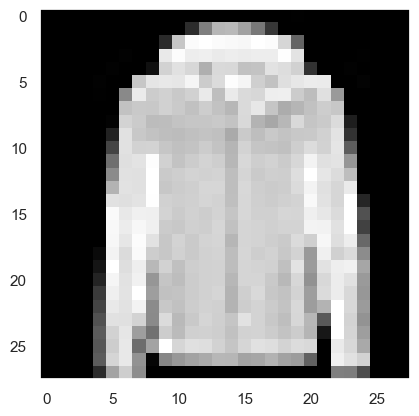

In [ ]:
# Divide X_test values by 255 -> new ranges (0 - 1)
X_test = X_test/255.0
# Split data in validation (5000) and train (55000)
X_val, X_train = X_train_full[:5000]/255, X_train_full[5000:]/255
# The same, but for y. 
y_val, y_train = y_train_full[:5000], y_train_full[5000:]
# Classes given in https://keras.io/api/datasets/fashion_mnist/
class_names = np.array([ "T-shirt/top" , "Trouser" , "Pullover" , "Dress" , "Coat" , "Sandal" , 
               "Shirt" , "Sneaker" , "Bag" , "Ankle boot" ])

# Inspect some aspects of the data (in general, you should play around with the data 
#                                   more than this to get a feel for it)
# Check that scaled types are appropriate
print(X_train.dtype)
print(X_val.dtype)
# Look at first item
print(class_names[y_train[0]])
plt.imshow(X_train[0,:,:], cmap='gray')
plt.grid(False)
plt.show()

### **Examining Balanced Data**
In any dataset, but especially in classification datasets, it is important to work out whether the dataset is balanced. As we are using an MNIST dataset, we are almost guaranteed to have a balanced dataset, but there are many applications where this is not the case. Health for example often has a high number of healthy cases (because the disease in question is rare) or pathological cases (because the number of healthy people who get scanned for diseases they don't have is low).

Before just running a 'hist' function, you'll need to know how many classes you have.

Total Unique Classes:  10


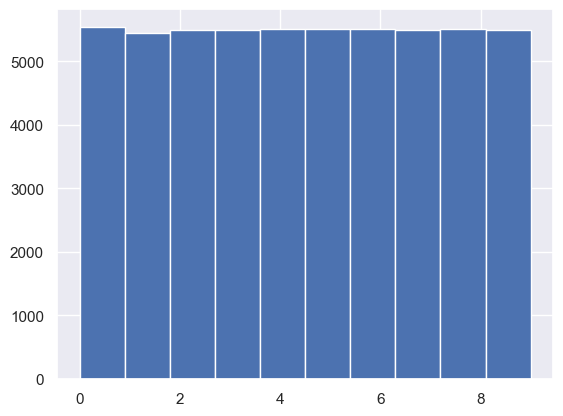

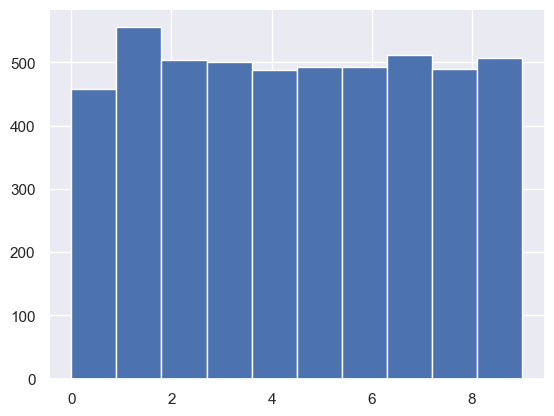

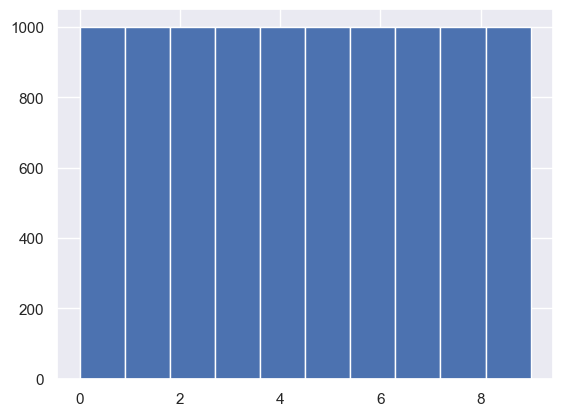

In [ ]:
# Check number of classes
unique_total = np.unique(y_train).shape[0]
print("Total Unique Classes: ", unique_total)

# Let's look at the distribution of labels in the training, validation and test sets
plt.hist(y_train)
plt.show()
plt.hist(y_val)
plt.show()
plt.hist(y_test)
plt.show()

### **Simple Neural Network Code with Keras**

We will use the keras version built into tensorflow version 2.
It is remarkably simple for building, training and evaluating networks.

In [ ]:
# This is *all* the code needed to define the network architecture
#  1 input layer + 2 hidden layers of sizes 300 and 100 + 1 output layer
model = keras.models.Sequential()   # This is a style of building networks - the easiest option
model.add(keras.layers.Flatten(input_shape = [28 , 28]))   # our inputs are 28 x 28 arrays, so need to become 1D
model.add(keras.layers.Dense(300, activation = "relu"))    # first hidden layer
model.add(keras.layers.Dense(100, activation = "relu"))    # second hidden layer
model.add(keras.layers.Dense(10, activation = "softmax"))  # output layer

In [ ]:
# Print out some info on the network - take note of the number of parameters (weights and biases)
# Can you calculate the number of parameters yourself?
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_16 (Dense)            (None, 300)               235500    
                                                                 
 dense_17 (Dense)            (None, 100)               30100     
                                                                 
 dense_18 (Dense)            (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Couple the architecture definition to a loss function and optimiser (and other performance metrics)
# Note that we use sparse_categorical_crossentropy because the entries in y_train are just numbers from 0 to 9
# If y_train was encoded as one-hot vectors, then the appropriate loss would be categorical_crossentropy instead
# We will use the SGD optimiser here, but Adam is another popular choice
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [ ]:
# Now train (fit) the model, specifying appropriate data and number of epochs (small here to save time)
# Save the history of metrics versus epochs - *always* keep this
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_val, y_val), batch_size=32)
# With batch size = 32, we go to iterate 1719 times (55,000 / 32 = 1719). One iteration = Updating parameters (weights + bias)

Epoch 1/5
1719/1719 [==============================] - 7s 4ms/step - loss: 0.7148 - accuracy: 0.7657 - val_loss: 0.5072 - val_accuracy: 0.8328
Epoch 2/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4878 - accuracy: 0.8313 - val_loss: 0.4437 - val_accuracy: 0.8498
Epoch 3/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4423 - accuracy: 0.8462 - val_loss: 0.4163 - val_accuracy: 0.8596
Epoch 4/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4140 - accuracy: 0.8547 - val_loss: 0.4122 - val_accuracy: 0.8548
Epoch 5/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3944 - accuracy: 0.8615 - val_loss: 0.3801 - val_accuracy: 0.8684


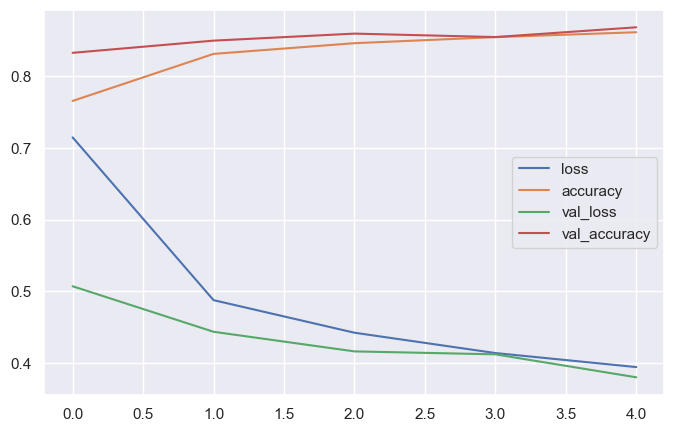

In [ ]:
# Simple way to plot the history information (see later for more detail)
pd.DataFrame(history.history).plot(figsize=(8 , 5))
plt.show()

In [ ]:
# Now run the model on the test set and get results (loss and accuracy both reported)
testres = model.evaluate(X_test, y_test, verbose=0)
print(testres)

[0.42062094807624817, 0.8515999913215637]


In [ ]:
# We can look at the probability of predicting each class for each image
# Each row has ten probabilities (one per class)
y_pred = model.predict(X_val[:3])  # use the first three validation cases as an example
print(y_pred.round(2))  # round to two decimal places when printing

1/1 [==============================] - 0s 79ms/step
[[0.   0.   0.   0.   0.   0.   0.   0.   0.   1.  ]
 [0.98 0.   0.   0.   0.   0.   0.02 0.   0.   0.  ]
 [0.3  0.08 0.05 0.27 0.11 0.   0.19 0.   0.01 0.  ]]


1/1 [==============================] - 0s 25ms/step
[9 2 1]
Prediction:  ['Ankle boot' 'Pullover' 'Trouser']
True:  ['Ankle boot' 'Pullover' 'Trouser']


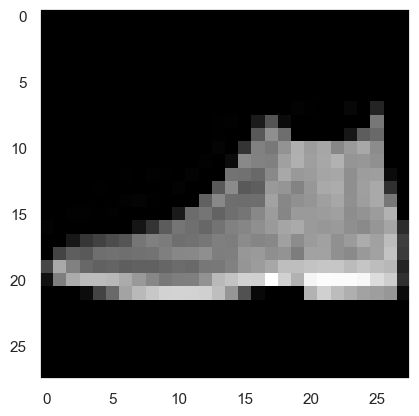

In [ ]:
# We can do the prediction in test
y_pred = model.predict(X_test[:3])
# We can inspect the output class predictions by find the class with maximum probability
y_pred = np.argmax(model.predict(X_test[:3]), axis=-1)
print(y_pred)   # predicted classes
print("Prediction: ", class_names[y_pred])   # names of these classes (prediction)
print("True: ", class_names[y_test[:3]])   # names of true classes
# Display an image of the first test sample
plt.imshow(X_test[0].reshape((28,28)), cmap="gray")
plt.grid(False)

### **Now for a little more detail**

For example, why make these particular choices for architecture and parameters.

We will set up some more general code so that we can build and compare a range of networks.

In [ ]:
# More general settings
# Let's allow the size of the training and validation sets to change
#n_train = n_total   # as above
#n_valid = 5000      # as above
n_train = 5000   # smaller set
n_val = 1000
# Define the number and size of hidden layers
#hiddensizes = [300, 100]  # this was what we did above
hiddensizes = [100]   # instead, try a simpler one (only one layer)
# Define the activation function to be used by hidden layers
actfn = "relu"
# Optimiser and learning rate
optimizer = keras.optimizers.SGD
learningrate = 0.01
# Set size of batch and number of epochs
batch_size = 50
n_epochs = 20

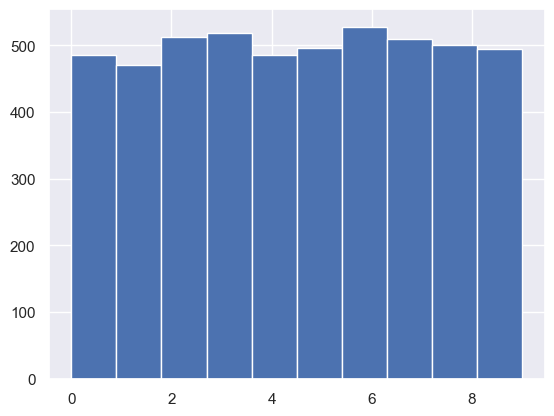

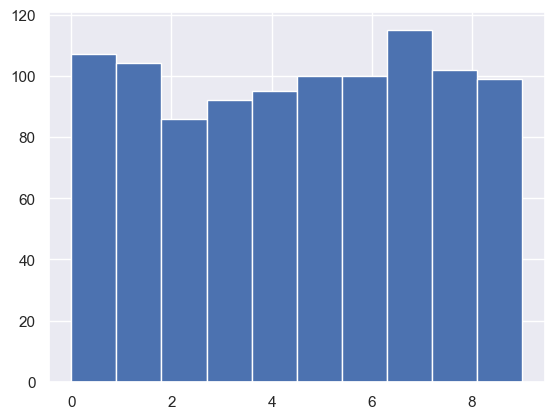

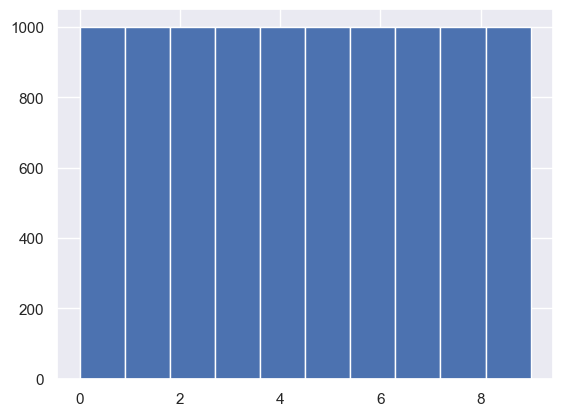

In [ ]:
# Let's look at the distribution of labels in the training, validation and test sets we will use
plt.hist(y_train[:n_train])
plt.show()
plt.hist(y_val[:n_val])
plt.show()
plt.hist(y_test)
plt.show()

In [ ]:
# Build a more general model using various settings
def model_factory(hiddensizes, actfn, optimizer, learningrate):
    model = keras.models.Sequential()
    model.add(keras.layers.Flatten(input_shape = [28 , 28]))    # always have same sized inputs
    for n in hiddensizes:
        model.add(keras.layers.Dense(n, activation = actfn))
    model.add(keras.layers.Dense(10, activation = "softmax"))   # always have 10 classes
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer(learning_rate=learningrate), metrics=["accuracy"])
    return model

In [ ]:
# Create our model
model = model_factory(hiddensizes, actfn, optimizer, learningrate)
# Show summary info
model.summary()
# Train it with only n_train training samples and n_valid validation samples, and other settings specified above
#history = model.fit( ### you should fill this in yourself ### )
history = model.fit(X_train[:n_train], y_train[:n_train], epochs=n_epochs, validation_data=(X_val[:n_val], y_val[:n_val]), 
                    batch_size=batch_size)    

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_19 (Dense)            (None, 100)               78500     
                                                                 
 dense_20 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
100/100 [==============================] - 1s 5ms/step - loss: 1.6513 - accuracy: 0.4860 - val_loss: 1.2719 - val_accuracy: 0.6340
Epoch 2/20
100/100 [==============================] - 0s 3ms/step - loss: 1.1258 - accuracy: 0.6542 - val_loss: 1.0120 - val_accuracy: 0.6720
Epoch 3/20
100/100 [==========

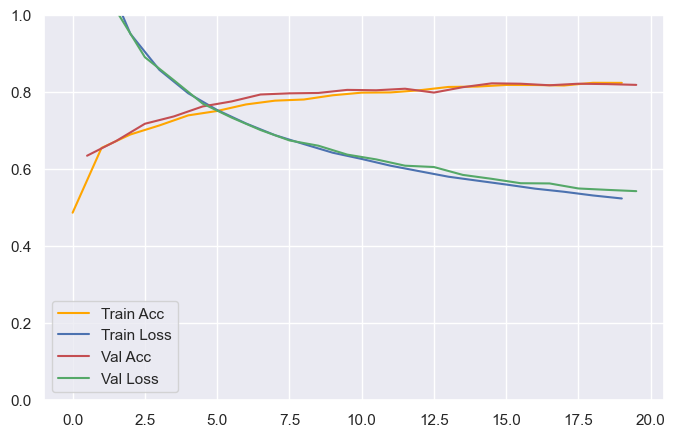

In [ ]:
# Plot the results (shifting validation curves appropriately)
plt.figure(figsize=(8,5))
plt.plot(np.arange(0,n_epochs),history.history['accuracy'], color='orange')
plt.plot(np.arange(0,n_epochs),history.history['loss'],'b')
plt.plot(np.arange(0,n_epochs)+0.5,history.history['val_accuracy'],'r')  # offset both validation curves
plt.plot(np.arange(0,n_epochs)+0.5,history.history['val_loss'],'g')
plt.legend(['Train Acc','Train Loss','Val Acc','Val Loss'])
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1] 
plt.show() 

In [ ]:
# Display best accuracy on validation set
max_val_acc = np.max(history.history['val_accuracy'])
print(f'Best validation accuracy = {max_val_acc:.3f}')   # NB: .3f displays 3 decimal places
# Evaluate on testset
testres = model.evaluate(X_test, y_test, verbose=0)
print(f'Accuracy on test set = {testres[1]:.3f}')

Best validation accuracy = 0.822
Accuracy on test set = 0.802


In [ ]:
# This function does everything: creates a model, trains it, then returns a performance measure
# Note that I have been a bit lazy here in not passing in the data explicit (X_train, y_train, X_val, y_val)
#  - this is generally bad practice, but makes this a little easier to see here as a learning exercise, but don't do this in practice
def do_all(hiddensizes, actfn, optimizer, learningrate, n_train, n_val, n_epochs, batch_size):
    # Create our model
    model = model_factory(hiddensizes, actfn, optimizer, learningrate)
    # Train it
    history = model.fit(X_train[:n_train], y_train[:n_train], epochs=n_epochs, validation_data=(X_val[:n_val], y_val[:n_val]), 
                        batch_size=batch_size)
    max_val_acc = np.max(history.history['val_accuracy'])
    return (max_val_acc, history)

In [ ]:
# Use the previous function to allow us to select options for our Deep Learning model randomly and then see how that performs
def random_model():
    # Make some random selections to see how performance varies with network size and training set size
    lsize=[10,100,1000]   # just have three options for layer sizes
    # start with three candidate layers
    hiddensizes = [lsize[np.random.randint(0,3)], lsize[np.random.randint(0,3)], lsize[np.random.randint(0,3)]]
    # then keep between 1 and 3 layers
    hiddensizes = hiddensizes[:np.random.randint(1,4)]
    n_train = np.random.randint(1,10)*10**np.random.randint(2,4)  # numbers between 100 and 9000 (logarithmically selected)
    n_epochs = 10  # to speed things up a bit (not recommended for proper evaluation)
    # Now build, run and report
    valacc, history = do_all(hiddensizes, actfn, optimizer, learningrate, n_train, n_val, n_epochs, batch_size)
    print(f'Settings are: {(hiddensizes, actfn, optimizer, learningrate, n_train, n_val, n_epochs, batch_size)}')
    print(f'Validation accuracy = {valacc:.3f}')
    retval = [hiddensizes, valacc]
    return retval

In [ ]:
res = random_model()

Epoch 1/10
2/2 [==============================] - 1s 270ms/step - loss: 2.3864 - accuracy: 0.0800 - val_loss: 2.3176 - val_accuracy: 0.0930
Epoch 2/10
2/2 [==============================] - 0s 104ms/step - loss: 2.3002 - accuracy: 0.1100 - val_loss: 2.2582 - val_accuracy: 0.1340
Epoch 3/10
2/2 [==============================] - 0s 106ms/step - loss: 2.2249 - accuracy: 0.1500 - val_loss: 2.2038 - val_accuracy: 0.1820
Epoch 4/10
2/2 [==============================] - 0s 115ms/step - loss: 2.1496 - accuracy: 0.2500 - val_loss: 2.1556 - val_accuracy: 0.2320
Epoch 5/10
2/2 [==============================] - 0s 131ms/step - loss: 2.0849 - accuracy: 0.2800 - val_loss: 2.1119 - val_accuracy: 0.2720
Epoch 6/10
2/2 [==============================] - 0s 115ms/step - loss: 2.0257 - accuracy: 0.3400 - val_loss: 2.0713 - val_accuracy: 0.2980
Epoch 7/10
2/2 [==============================] - 0s 136ms/step - loss: 1.9752 - accuracy: 0.3600 - val_loss: 2.0332 - val_accuracy: 0.3130
Epoch 8/10
2/2 [====

### **What to do now**

 - Explore what differences these options make
 - Use the results to select a best model
 - Measure its performance on the test set
 - Compare it to the performance on the validation set